## The dataset

This is a real dataset and it was downloaded using web scraping techniques. The data contains registers from fotocasa which is one of the most popular websites of real estate in Spain. Please, do not do this (web scraping) unless it is for academic purposes.

The dataset was downloaded a few years ago by Henry Navarro and In no case were economic returns obtained from it.

It contains thousands of data from real homes published on the web www.fotocasa.com. Your goal is to extract as much information as possible with the knowledge you have so far about data science, for example what is the most expensive home in the entire dataset?

Let's start with precisely that question... Good luck!


#### Read the dataset assets/real_estate.csv and try to visualize the table (★☆☆)

In [9]:
""" import ajkna """
import pandas as pd
import numpy as np
df = pd.read_csv('./assets/real_estate.csv', sep=";")
print(df)

       Unnamed: 0  id_realEstates  isNew                    realEstate_name  \
0               1       153771986  False            ferrari 57 inmobiliaria   
1               2       153867863  False  tecnocasa fuenlabrada ferrocarril   
2               3       153430440  False                 look find boadilla   
3               4       152776331  False  tecnocasa fuenlabrada ferrocarril   
4               5       153180188  False            ferrari 57 inmobiliaria   
...           ...             ...    ...                                ...   
15330       15331       153901377  False                infocasa consulting   
15331       15332       150394373  False                inmobiliaria pulpon   
15332       15333       153901397  False             tecnocasa torrelodones   
15333       15334       152607440  False                inmobiliaria pulpon   
15334       15335       153901356  False                infocasa consulting   

       phone_realEstate                            

#### What is the most expensive home in the dataset? (★☆☆)

In [10]:
import pandas as pd

df = pd.read_csv('./assets/real_estate.csv', sep=";")
column = df["price"]
max_index = column.idxmax()
print(f"The id of the most expensive house is {max_index}")

The id of the most expensive house is 13110


#### What is cheapest home in the dataset? (★☆☆)

In [13]:
import pandas as pd
df = pd.read_csv('./assets/real_estate.csv', sep=";")
column = df["price"]
max_index = column.idxmax()
print(f"The id of the most expensive house is {max_index}")

The id of the most expensive house is 13110


#### What is the biggest and the smallest home in the dataset? (★☆☆)

In [17]:
import pandas as pd
df = pd.read_csv('./assets/real_estate.csv', sep=";")
column = df["surface"]
max_index = column.idxmax()
surface_max = column.min()
min_index = column.idxmin()
surface_min = column.max()
print(f"The id of the smallest house is {min_index} and has a surface of {surface_min}")
print(f"The id of the biggest house is {max_index} and has a surface of {surface_max}")

The id of the smallest house is 498 and has a surface of 249000.0
The id of the biggest house is 6794 and has a surface of 15.0


#### How many populations (level5) the dataset contains? (★☆☆)

In [19]:
import pandas as pd
df = pd.read_csv('./assets/real_estate.csv', sep=";")
column = df["level5"]
""" n unique """
print(column.unique().size)

168


#### Does the dataset contain NAs? (★☆☆)


In [23]:
import pandas as pd
df = pd.read_csv('./assets/real_estate.csv', sep=";")
""" .info """
print(df.isnull().values.any())
print(df.isnull().sum())
print(df.isnull().sum().sum())

True
Unnamed: 0              0
id_realEstates          0
isNew                   0
realEstate_name        10
phone_realEstate      794
url_inmueble            0
rooms                 353
bathrooms             345
surface              1250
price                   0
date                    0
description           142
address                 0
country                 0
level1                  0
level2                  0
level3                  0
level4               6643
level5                  0
level6              14627
level7               2277
level8               8579
upperLevel              0
countryId               0
level1Id                0
level2Id                0
level3Id                0
level4Id                0
level5Id                0
level6Id                0
level7Id                0
level8Id                0
accuracy                0
latitude                0
longitude               0
zipCode             15335
customZone          15335
dtype: int64
65690


#### Delete the NAs of the dataset, if applicable (★★☆)

In [26]:
import pandas as pd
df = pd.read_csv('./assets/real_estate.csv', sep=";")
""" axis """
if(df.isnull().values.any()):
    stripped_df = df.dropna()
    print(stripped_df)
else:
    print(df)

Empty DataFrame
Columns: [Unnamed: 0, id_realEstates, isNew, realEstate_name, phone_realEstate, url_inmueble, rooms, bathrooms, surface, price, date, description, address, country, level1, level2, level3, level4, level5, level6, level7, level8, upperLevel, countryId, level1Id, level2Id, level3Id, level4Id, level5Id, level6Id, level7Id, level8Id, accuracy, latitude, longitude, zipCode, customZone]
Index: []

[0 rows x 37 columns]


#### What is the mean of prices in the population (level5) of "Arroyomolinos (Madrid)"? (★★☆)

In [27]:
import pandas as pd
df = pd.read_csv('./assets/real_estate.csv', sep=";")
filtered_df = df[df['level5'] == "Arroyomolinos (Madrid)"]
""" mean promedio """
""" sacar el na de price """
""" nan min (np)"""
print(filtered_df['price'].mean())

294541.59854014596


#### Plot the histogram of prices for the population (level5) of "Arroyomolinos (Madrid)" and explain what you observe (★★☆)

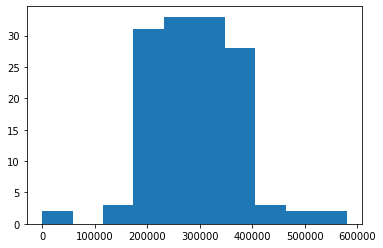


    The price of the houses is approximately 300000
    


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./assets/real_estate.csv', sep=";")
filtered_df = df[df['level5'] == "Arroyomolinos (Madrid)"]
plt.hist(filtered_df['price'])
plt.show()
observations = \
    """
    The price of the houses is approximately 300000
    """
print(observations)

#### Now let's work with the "south belt" of madrid. Make a subsetting that contains the following populations (level5): "Fuenlabrada","Leganés","Getafe","Alcorcón" (★★☆) 

In [1]:
import pandas as pd

df = pd.read_csv('./assets/real_estate.csv', sep=";")
filtered_df = df[df['level5'].isin(("Fuenlabrada", "Leganés", "Getafe", "Alcorcón"))]
print(filtered_df)

       Unnamed: 0  id_realEstates  isNew  \
1               2       153867863  False   
3               4       152776331  False   
85             86       153152077  False   
94             95       153995577  False   
109           110       153586414  False   
...           ...             ...    ...   
15275       15276       153903887  False   
15291       15292       151697757  False   
15305       15306       153902389  False   
15322       15323       153871864  False   
15325       15326       153901467  False   

                                 realEstate_name  phone_realEstate  \
1              tecnocasa fuenlabrada ferrocarril       916358736.0   
3              tecnocasa fuenlabrada ferrocarril       916358736.0   
85                       sinergical inmobiliaria               NaN   
94                               viviendas365com       911226014.0   
109              area uno asesores inmobiliarios       912664081.0   
...                                          ...   

#### Make a bar plot of the median of prices (★★★) 

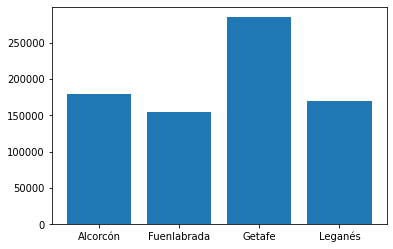

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./assets/real_estate.csv', sep=';')
filtered_df = df[df['level5'].isin(('Fuenlabrada', 'Leganés', 'Getafe', 'Alcorcón'))]
filtered_df = filtered_df[['level5', 'price']]
grouped_filtered_df = filtered_df.groupby('level5').median()
keys = grouped_filtered_df.index.values.tolist()
values = grouped_filtered_df['price'].tolist()
plt.bar(keys, values)
plt.show()

#### Calculate the sample mean and variance of the variables: price, rooms, surface area and bathrooms (★★★) 

In [3]:
import pandas as pd

df = pd.read_csv('./assets/real_estate.csv', sep=';')
filtered_df = df[df['level5'].isin(('Fuenlabrada', 'Leganés', 'Getafe', 'Alcorcón'))]
filtered_df = filtered_df[['level5', 'price', 'rooms', 'surface', 'bathrooms']]
grouped_filtered_df = filtered_df.groupby('level5')
print("Mean of the requested variables")
print(grouped_filtered_df.mean())
print()
print()
print("Variance of the requested variables")
print(grouped_filtered_df.var())

Mean of the requested variables
                     price     rooms     surface  bathrooms
level5                                                     
Alcorcón     230071.052632  2.914894  105.913295   1.623656
Fuenlabrada  177198.021459  3.025974  103.624365   1.445415
Getafe       265040.500000  3.151724  126.896266   1.865052
Leganés      208682.010309  2.906736  105.852273   1.518135


Variance of the requested variables
                    price     rooms      surface  bathrooms
level5                                                     
Alcorcón     1.594783e+10  0.933895  4244.323834   0.592735
Fuenlabrada  4.701021e+09  0.355844  2264.643893   0.353367
Getafe       2.098267e+10  0.772748  5828.110028   0.658809
Leganés      1.191394e+10  0.824590  3987.475195   0.553055


#### What is the most expensive home of each population? (★★☆) 

In [5]:
import pandas as pd

def get_population_most_expensive_home_data(population_df: pd.DataFrame):
    result = {
        "most_expensive_home": {
            "id": population_df['price'].idxmax(), 
            "price": population_df['price'].max()
        }
    }
    return result

df = pd.read_csv('./assets/real_estate.csv', sep=';')
populations_to_filter = ('Fuenlabrada', 'Leganés', 'Getafe', 'Alcorcón')
filtered_df = df[df['level5'].isin(populations_to_filter)]
filtered_df = filtered_df[['level5', 'price']]
population_specific_df = [filtered_df[filtered_df['level5'] == population] for population in populations_to_filter]
most_expensive_homes_dict = {
    population_df['level5'].iloc[0]: get_population_most_expensive_home_data(population_df=population_df) 
    for population_df in population_specific_df
}
print(most_expensive_homes_dict)

{'Fuenlabrada': {'most_expensive_home': {'id': 11561, 'price': 490000}}, 'Leganés': {'most_expensive_home': {'id': 10412, 'price': 650000}}, 'Getafe': {'most_expensive_home': {'id': 2881, 'price': 1050000}}, 'Alcorcón': {'most_expensive_home': {'id': 5585, 'price': 950000}}}


#### Normalize the variable of prices for each population and plot the 4 histograms in the same plot (★★★) 

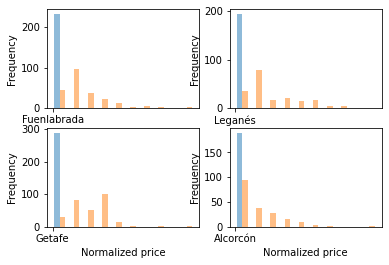

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

def normalize_price(df: pd.DataFrame) -> pd.DataFrame:
    column = 'price'
    new_df = df.copy() 
    new_df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())
    return new_df

df = pd.read_csv('./assets/real_estate.csv', sep=';')
populations_to_filter = ('Fuenlabrada', 'Leganés', 'Getafe', 'Alcorcón')
filtered_df = df[df['level5'].isin(populations_to_filter)]
filtered_df = filtered_df[['level5', 'price']]
population_specific_df = [filtered_df[filtered_df['level5'] == population] for population in populations_to_filter]
population_specific_df = [normalize_price(df) for df in population_specific_df]

for index, population_df in enumerate(population_specific_df):
    plt.subplot(2, 2, index + 1)
    plt.xlabel('Normalized price')
    plt.ylabel('Frequency')
    plt.hist(population_df, alpha=0.5, label=population_df['level5'].iloc[0])

plt.show()

#### Make a plot of the coordinates (lat and long) of the south belt of Madrid by color of each population (★★★★) 
This is a extremely hard exercise and we highly recommend to do it at the end of everything

In [11]:
# jupyter nbextension enable --py --sys-prefix ipyleaflet

from ipyleaflet import Map, basemaps, Marker
import pandas as pd

# Map centred on (60 degrees latitude et -2.2 degrees longitude)
# Latitude, longitude
map = Map(center = (60, -2.2), zoom = 2, min_zoom = 1, max_zoom = 20, 
    basemap=basemaps.Stamen.Terrain)

df = pd.read_csv('./assets/real_estate.csv', sep=';')
filtered_df = df[['level5', 'latitude', 'longitude']]
populations_to_filter = ('Fuenlabrada', 'Leganés', 'Getafe', 'Alcorcón')
colors = ('red', 'blue', 'yellow', 'pink')
population_df_dict = {
    population: filtered_df[filtered_df['level5'] == population].dropna()
    for population in populations_to_filter
}

for population in populations_to_filter:
    population_df = population_df_dict[population]
    for index in range(len(population_df)):
        location = (population_df.iloc[index]['latitude'],
            population_df.iloc[index]['longitude'])
        marker = Marker(location=location, draggable=False,
            color=colors[populations_to_filter.index(population)])
        map.add_layer(marker)

map

Map(center=[60, -2.2], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

In [13]:
from ipyleaflet import Map, basemaps, Marker
import pandas as pd

# Map centred on (60 degrees latitude et -2.2 degrees longitude)
# Latitude, longitude
map = Map(center = (60, -2.2), zoom = 2, min_zoom = 1, max_zoom = 20, 
    basemap=basemaps.Stamen.Terrain)

df = pd.read_csv('./assets/real_estate.csv', sep=';')
filtered_df = df[['level5', 'latitude', 'longitude']]
populations_to_filter = ('Fuenlabrada', 'Leganés', 'Getafe', 'Alcorcón')
colors = ('red', 'blue', 'yellow', 'pink')
population_df_dict = {population: filtered_df[filtered_df['level5'] == population].dropna() for population in populations_to_filter}

for population in populations_to_filter:
    population_df = population_df_dict[population]
    for index in range(len(population_df)):
        location = (population_df.iloc[index]['latitude'], population_df.iloc[index]['longitude'])
        marker = Marker(location=location, draggable=False, color=colors[populations_to_filter.index(population)])
        map.add_layer(marker)

map

Map(center=[60, -2.2], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

#### What can you say about the price per square meter between the towns of Getafe and Alcorcón?

In [15]:
import pandas as pd

def get_price_per_square_meter_info(df: pd.DataFrame):
    return {
        'price_per_square_meter': {
                'average': df['price_per_square_meter'].mean(),
                'median': df['price_per_square_meter'].median(),
        }
    }

def print_conclusions():
    print()
    print("Thus ...")
    print("Properties in Getafe are in average cheaper than those found in Alcorcón by the square meter")
    print()

df = pd.read_csv('./assets/real_estate.csv', sep=';')
filtered_df = df[['level5', 'price', 'surface']]
populations_to_filter = ('Getafe', 'Alcorcón')
population_df_dict = {population: filtered_df[filtered_df['level5'] == population].dropna() for population in populations_to_filter}
price_per_square_meter_info_dict = {}
for population in population_df_dict:
    population_df_dict[population]['price_per_square_meter'] = filtered_df['price'] / filtered_df['surface']
    price_per_square_meter_info = get_price_per_square_meter_info(df=population_df_dict[population])
    price_per_square_meter_info_dict[population] = price_per_square_meter_info

print(price_per_square_meter_info_dict)
print_conclusions()

{'Getafe': {'price_per_square_meter': {'average': 2066.314949251463, 'median': 1973.3333333333333}}, 'Alcorcón': {'price_per_square_meter': {'average': 2239.302480199618, 'median': 2207.7922077922076}}}

Thus ...
Properties in Getafe are in average cheaper than those found in Alcorcón by the square meter



#### Reload the data, is the average of "Valdemorillo" and "Galapagar" prices the same?

In [16]:
import pandas as pd

df = pd.read_csv('./assets/real_estate.csv', sep=';')
filtered_df = df[['level5', 'price']]
populations_to_filter = ('Valdemorillo', 'Galapagar')
population_df_dict = {population: filtered_df[filtered_df['level5'] == population].dropna() for population in populations_to_filter}
valdemorillo_average_price = population_df_dict[populations_to_filter[0]]['price'].mean()
galapagar_average_price = population_df_dict[populations_to_filter[1]]['price'].mean()
print()
print(f"{populations_to_filter[0]} has an average price of {valdemorillo_average_price}")
print(f"{populations_to_filter[1]} has an average price of {galapagar_average_price}")
if valdemorillo_average_price == galapagar_average_price:
    print("Yes, the average price is the same")
else:
    print("No, the average price is NOT the same")


Valdemorillo has an average price of 363860.2931034483
Galapagar has an average price of 360063.20238095237
No, the average price is NOT the same


#### What happens if we do the same analysis for price/m2 (★★☆) 

In [17]:
import pandas as pd

df = pd.read_csv('./assets/real_estate.csv', sep=';')
filtered_df = df[['level5', 'price', 'surface']]
populations_to_filter = ('Valdemorillo', 'Galapagar')
population_df_dict = {population: filtered_df[filtered_df['level5'] == population].dropna() for population in populations_to_filter}
for population in population_df_dict:
    population_df_dict[population]['price_per_square_meter'] = filtered_df['price'] / filtered_df['surface']

valdemorillo_average_price_per_square_meter = population_df_dict[populations_to_filter[0]]['price_per_square_meter'].mean()
galapagar_average_price_per_square_meter = population_df_dict[populations_to_filter[1]]['price_per_square_meter'].mean()

print()
print(f"{populations_to_filter[0]} has an average price per square meter of {valdemorillo_average_price_per_square_meter}")
print(f"{populations_to_filter[1]} has an average price per square meter of {galapagar_average_price_per_square_meter}")
if valdemorillo_average_price_per_square_meter == galapagar_average_price_per_square_meter:
    print("Yes, both have the same average price per square meter")
else:
    print("No, their average price per square meter is NOT the same")
print()


Valdemorillo has an average price per square meter of 1317.9502109024984
Galapagar has an average price per square meter of 1606.3240303094024
No, their average price per square meter is NOT the same



#### Could you say there is a relation between surface and price? (★★☆) 
Hint: make a scatter plot.

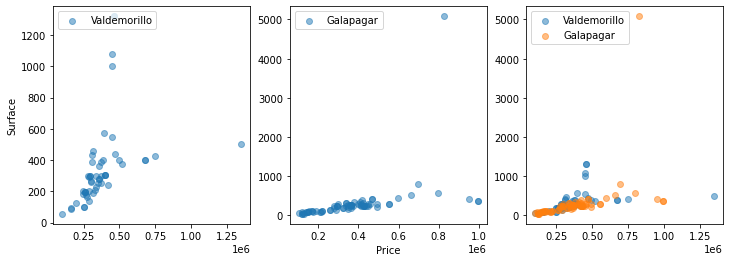

The relation between surface and price seems to be inversely proportional.
However, in Valdemorillo the surface grows faster than the price while in Galapagar seems to be the other way around.


In [18]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./assets/real_estate.csv', sep=';')
filtered_df = df[['level5', 'price', 'surface']]
populations_to_filter = ('Valdemorillo', 'Galapagar')
population_df_dict = {population: filtered_df[filtered_df['level5'] == population].dropna() for population in populations_to_filter}

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.ylabel('Surface')
plt.scatter(population_df_dict[populations_to_filter[0]]['price'], population_df_dict[populations_to_filter[0]]['surface'], alpha=0.5, label=populations_to_filter[0])
plt.legend(loc='upper left')
plt.subplot(1, 3, 2)
plt.scatter(population_df_dict[populations_to_filter[1]]['price'], population_df_dict[populations_to_filter[1]]['surface'], alpha=0.5, label=populations_to_filter[1])
plt.legend(loc='upper left')
plt.xlabel('Price')
plt.subplot(1, 3, 3)
plt.scatter(population_df_dict[populations_to_filter[0]]['price'], population_df_dict[populations_to_filter[0]]['surface'], alpha=0.5, label=populations_to_filter[0])
plt.scatter(population_df_dict[populations_to_filter[1]]['price'], population_df_dict[populations_to_filter[1]]['surface'], alpha=0.5, label=populations_to_filter[1])
plt.legend(loc='upper left')
plt.show()

print("There is a price difference according to the surface when it comes to small surface then the price seems to be maintained")

#### Make the same plot for 4 different populations (level5) and rearrange them on the same graph? (★★☆) 
Hint: make a scatter plot of each population using subplots.

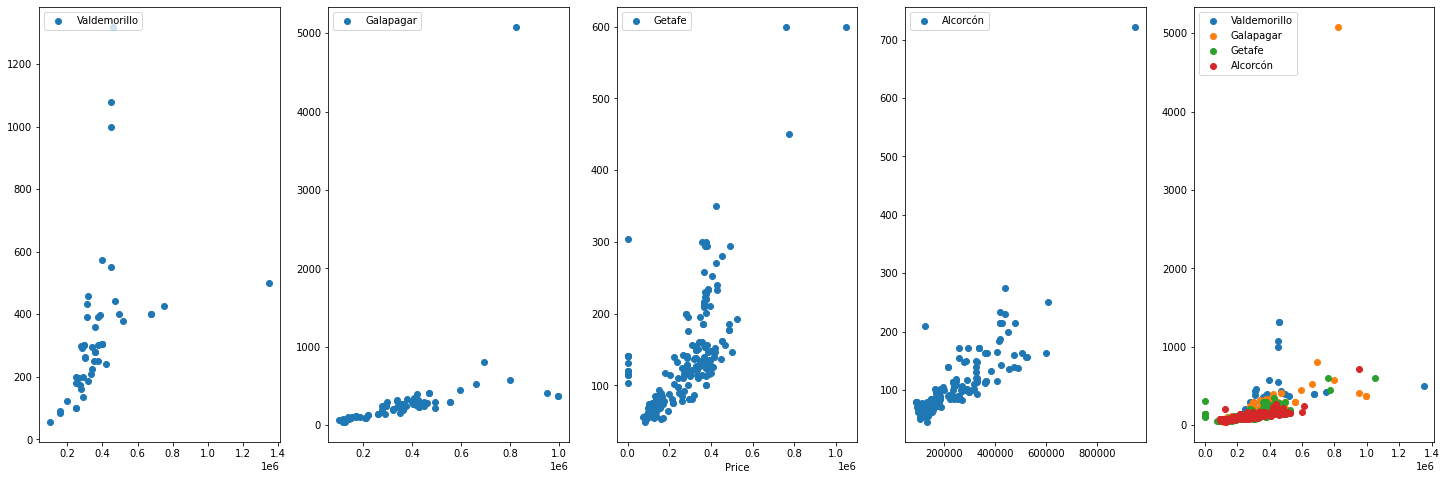

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./assets/real_estate.csv', sep=';')
filtered_df = df[['level5', 'price', 'surface']]
populations_to_filter = ('Valdemorillo', 'Galapagar', 'Getafe', 'Alcorcón')
population_df_dict = {population: filtered_df[filtered_df['level5'] == population].dropna() for population in populations_to_filter}

plt.figure(figsize=(25, 8))
plt.ylabel('Surface')

for index, population in enumerate(populations_to_filter):
    plt.subplot(1, 5, index + 1)
    plt.scatter(population_df_dict[populations_to_filter[index]]['price'], population_df_dict[populations_to_filter[index]]['surface'], label=populations_to_filter[index])
    plt.legend(loc='upper left')
    plt.subplot(1, 5, 5)
    plt.scatter(population_df_dict[populations_to_filter[index]]['price'], population_df_dict[populations_to_filter[index]]['surface'], label=populations_to_filter[index])

plt.subplot(1, 5, 5)
plt.legend(loc='upper left')
plt.subplot(1, 5, 3)
plt.xlabel('Price')
plt.show()

#### How many  real estate agencies the dataset contains? (★★☆) 

In [20]:
import pandas as pd

df = pd.read_csv('./assets/real_estate.csv', sep=';')
grouped_filtered_df = df.groupby(['id_realEstates'])
grouped_filtered_df = grouped_filtered_df['id_realEstates']
print(len(grouped_filtered_df.size()))

14217


#### What is the population (level 5) that contains the most houses? (★★☆) 

In [21]:
import pandas as pd

df = pd.read_csv('./assets/real_estate.csv', sep=';')
grouped_filtered_df = df.groupby(['level5'])
houses_per_population = grouped_filtered_df['level5'].count()
print(houses_per_population.idxmax())

 Madrid Capital
